___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = data.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.rename(columns={'Annual Income (k$)':"annual_income",'Spending Score (1-100)':'spending_score'},inplace=True)

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





## Dropping Irrelevant Column(s)

In [12]:
df.head(3)

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
df.set_index('customerid',inplace=True)

In [14]:
df = pd.get_dummies(df,drop_first=True)

In [15]:
df.head()

,age,annual_income,spending_score,gender_Male
customerid,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


### Unique number of features

In [16]:
df['age'].nunique()

51

In [17]:
df['annual_income'].nunique()

64

In [18]:
df['spending_score'].nunique()

84

In [19]:
df['gender_Male'].nunique()

2

## Relation between Annual Income and Spending Score

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

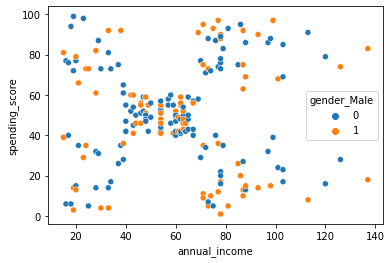

In [20]:
sns.scatterplot(data = df, x = "annual_income", y = "spending_score", hue = "gender_Male")

## Relation between Age and Spending Score

<AxesSubplot:xlabel='age', ylabel='spending_score'>

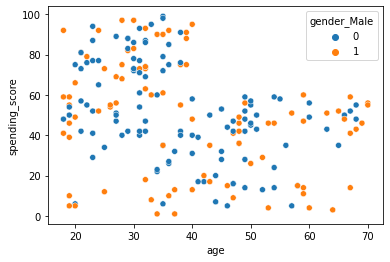

In [21]:
sns.scatterplot(data = df, x = "age", y = "spending_score", hue = "gender_Male")

## Relation between Age and Annual_income

<AxesSubplot:xlabel='age', ylabel='annual_income'>

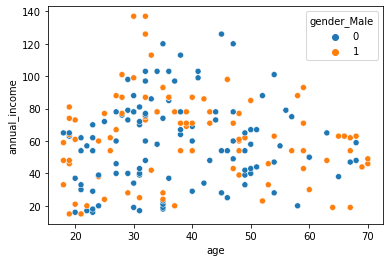

In [22]:
sns.scatterplot(data = df, x = "age", y = "annual_income", hue = "gender_Male")

<AxesSubplot:>

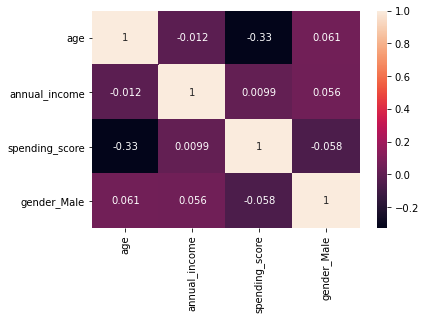

In [23]:
sns.heatmap(df.corr(),annot=True)

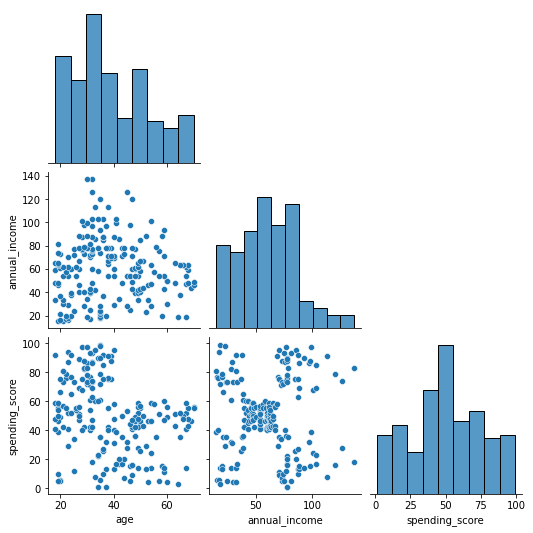

In [24]:
sns.pairplot(df.drop("gender_Male",axis=1),corner=True);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

Scale öncesi dummy edilmiş featureları çıkarıp scale etmek gerek.

In [25]:
df1 = df[['age',"spending_score"]]  # age-spend_score

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaled = StandardScaler()

In [28]:
scaled_df1 = scaled.fit_transform(df1)

In [29]:
from pyclustertend import hopkins

In [30]:
hopkins(scaled_df1,scaled_df1.shape[0])  # hopkins score should be under 0.5. Each time the score will change, cause random point will change eac time.

0.28703554203001264

#### *ii. Determine optimal number of clusters*

In [31]:
from sklearn.cluster import KMeans

In [32]:
ssd = []

K = range(2,10)  # if our data is too big, we can take sample inside our data and we can continue with it.
                 # we can use PCA methods to reduce data volume.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(scaled_df1)
    ssd.append(model.inertia_)

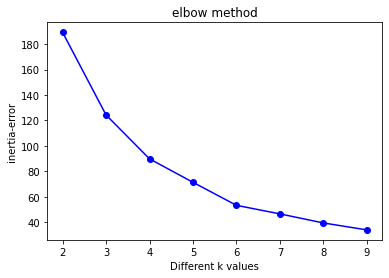

In [33]:
plt.plot(K, ssd, "bo-")  # --> K: n_cluster / ssd: inertia-error 
plt.xlabel("Different k values")
plt.ylabel("inertia-error")  # sum of square distance between point to centroits (SSD)
plt.title("elbow method");
# teoriye göre 3 olması gerek

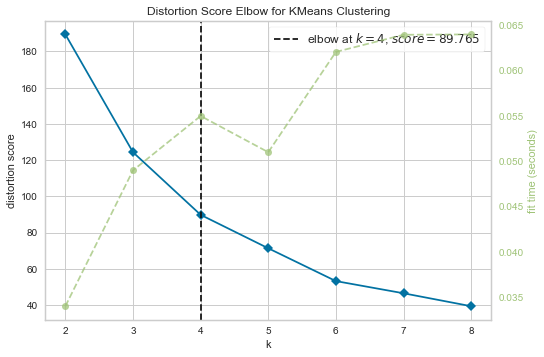

In [34]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaled_df1)        # Fit the data to the visualizer
visualizer.show();
# anlamlı düşüşleri takip eder.

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
# scale edilmiş
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# skorlar birbirine çok yakın 3,4,5 ve hatta 6 bile olabilir.

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433


In [37]:
# scale edilmemiş
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# zaten değerler birbirine yakın,
# kafa karışırsa scale edip ve etmeden denemek lazım,
# elbow, yellowbrick, ve silhouette birbirinden farklı tellerde çalıyorsa, denemek gerek.

# ben burada kümelemeyi en iyi yapabilecek en az feature sayısı ile insight elde etmeye çalışacağım.
# feature ne kadar çok olursa veriler girift olacak ve k-means düzgün çalışamayacak.

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


<center>silhouette_score değerlendirirken 2 şeye dikkat et:</center>
- bu skor ne kadar yüksek olsa bile inertia skorlarının çok büyük olmaması gerek<br>
- içerisinde dummy edilmiş bir feature var  ise standartscale etmemek gerek. dummy feature yok ise ve kafam karışıyorsa hem edip hem de etmeden denemek gerek.

#### *iii. Apply K Means*

#### n_cluster: 3 için

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df1)
cluster_labels = kmeans.labels_

In [39]:
cluster_labels

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [40]:
df1["cluster"] = cluster_labels

<ipython-input-40-2d8b0eb0bb28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cluster"] = cluster_labels


Text(0.5, 1.0, 'No Group')

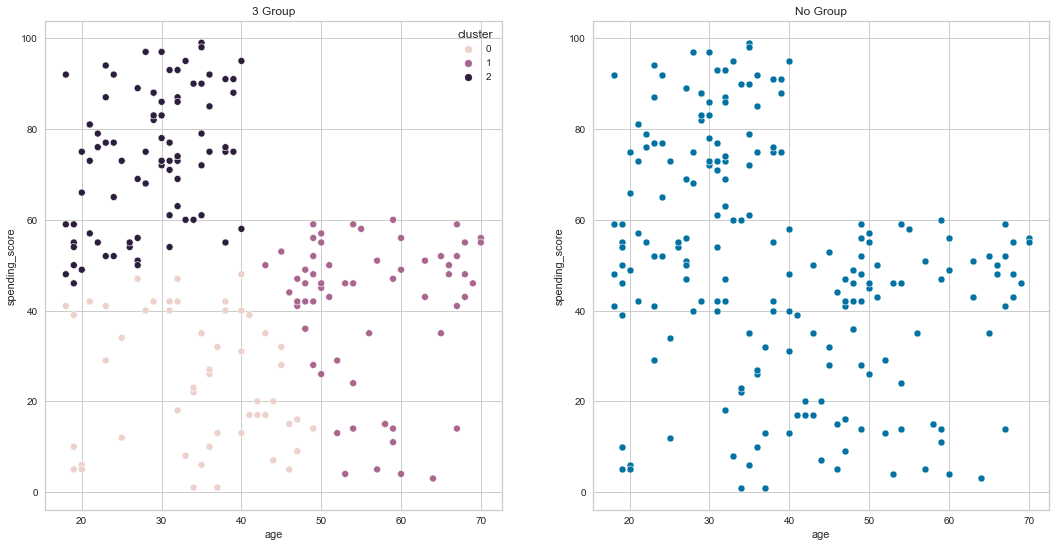

In [41]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster')
plt.title("3 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")
# cluster ile hue verilmiş.

#### n_cluster:4

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df1)
cluster_labels = kmeans.labels_

In [43]:
df1['cluster_k4'] = cluster_labels

Text(0.5, 1.0, 'No Group')

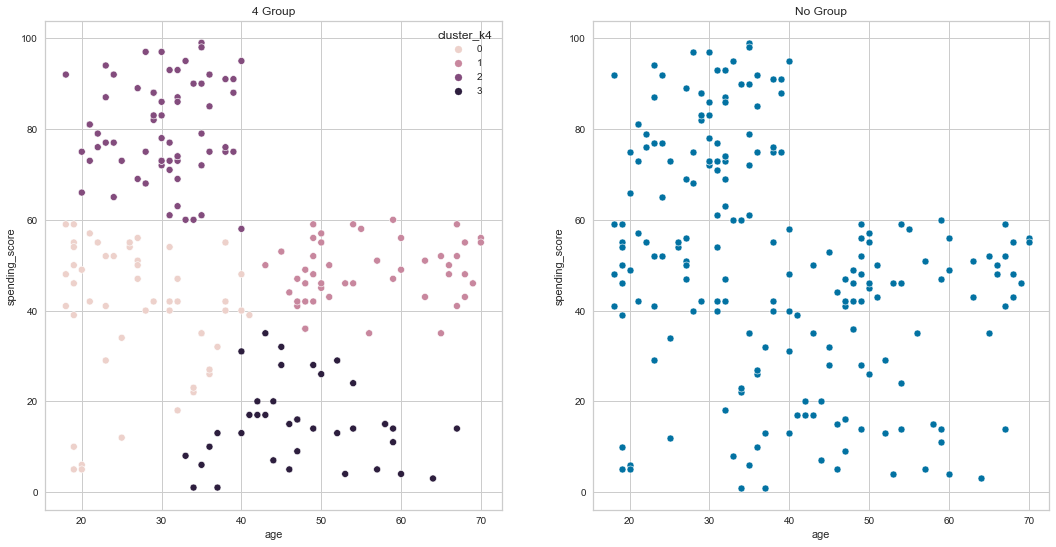

In [44]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster_k4')
plt.title("4 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

#### 5 için

Text(0.5, 1.0, 'No Group')

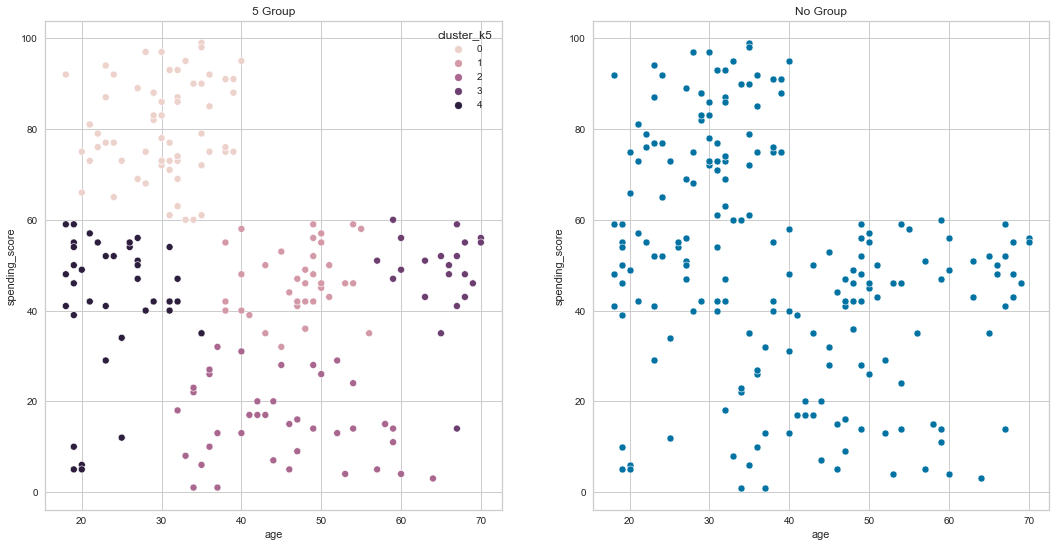

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df1)
cluster_labels = kmeans.labels_

df1['cluster_k5'] = cluster_labels

plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster_k5')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

___

#### *iv. Visualizing and Labeling All the Clusters*

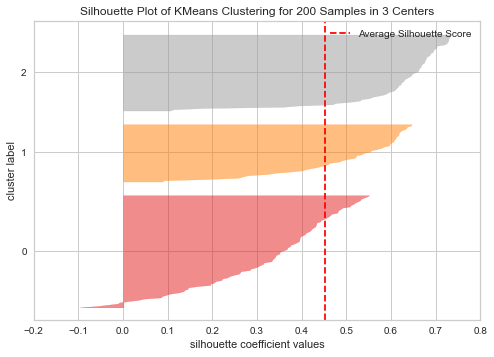

In [88]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

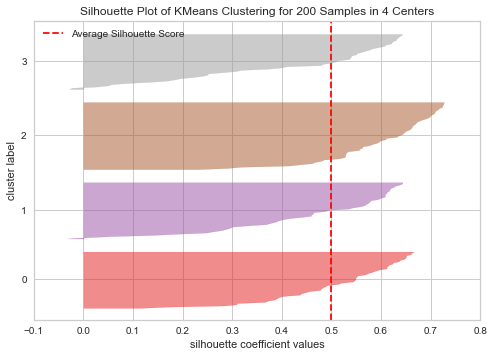

In [87]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

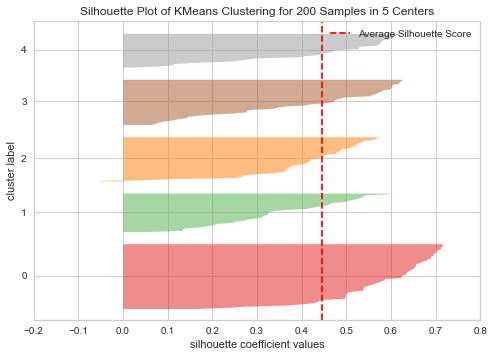

In [48]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

### Clustering based on Annual Income and Spending Score

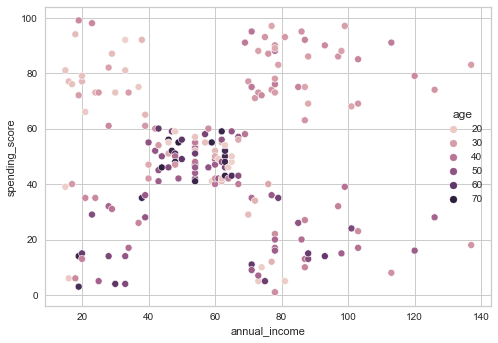

In [49]:
sns.scatterplot(data = df, x = "annual_income", y = "spending_score", hue = "age");

#### *i. Create a new dataset with two variables of your choice*

In [50]:
df2 = df[['annual_income','spending_score']]

#### *ii. Determine optimal number of clusters*

In [51]:
scaled_df2 = scaled.fit_transform(df2)

In [52]:
hopkins(scaled_df2,scaled_df2.shape[0])

0.30832574290694953

#### *iii. Apply K Means*

In [53]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(scaled_df2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

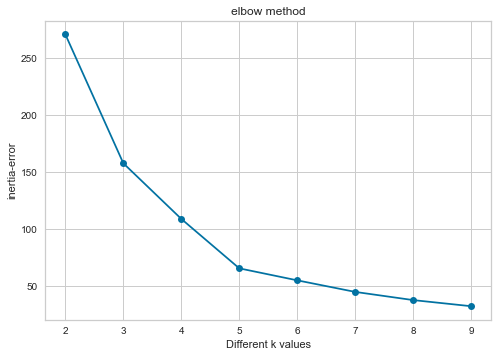

In [54]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

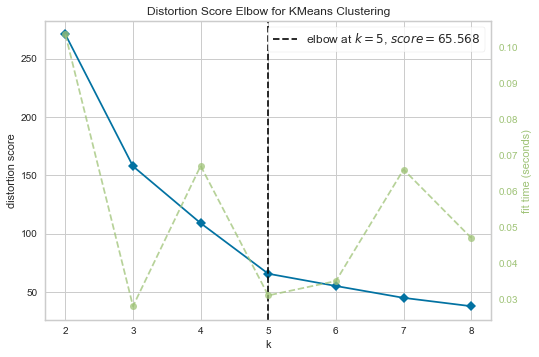

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaled_df2)        # Fit the data to the visualizer
visualizer.show();

In [56]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706


In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df2)
cluster_labels = kmeans.labels_

In [58]:
df2['cluster_k5'] = cluster_labels

<ipython-input-58-6055776c89e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster_k5'] = cluster_labels


Text(0.5, 1.0, 'No Group')

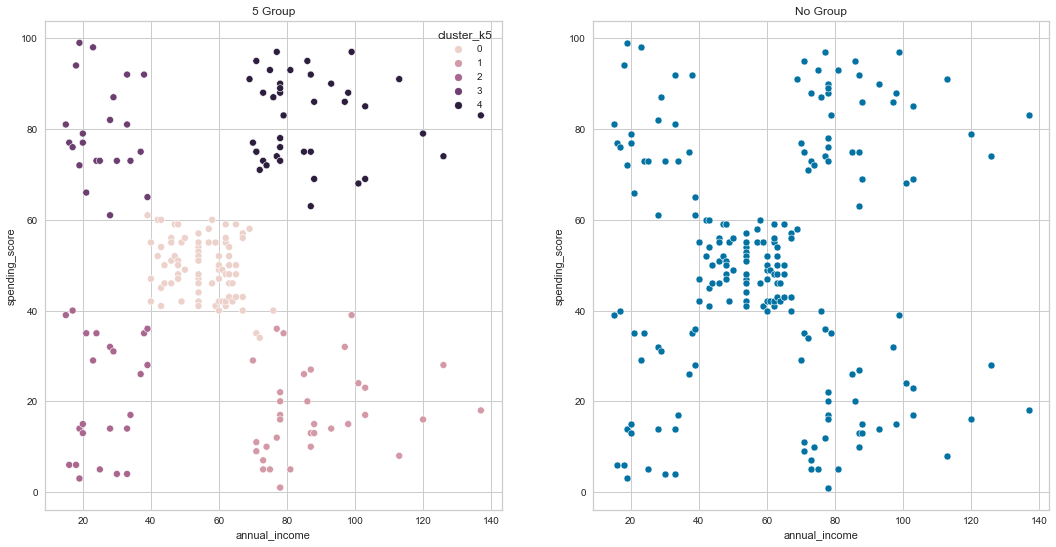

In [59]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df2, x = "annual_income",y = "spending_score", hue = 'cluster_k5')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score")
plt.title("No Group")

#### *iv. Visualizing and Labeling All the Clusters*

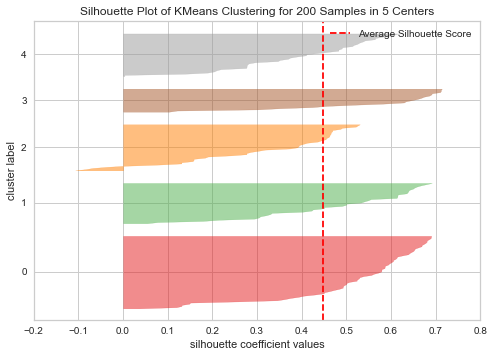

In [60]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_df1)    # Fit the data to the visualizer
visualizer.poof();

## APPLY Best_N_Cluster_Number Complete Dataframe

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaled = MinMaxScaler()

In [63]:
scaled_df = scaled.fit_transform(df)

In [64]:
hopkins(scaled_df,scaled_df.shape[0])

0.20562597784836395

In [65]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(scaled_df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

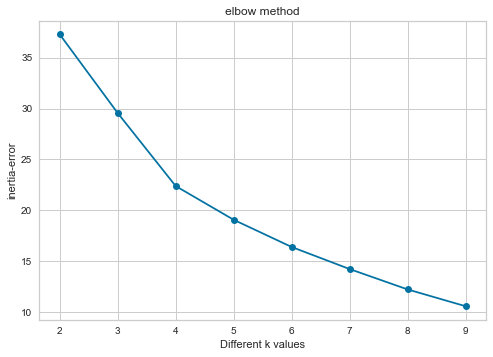

In [66]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

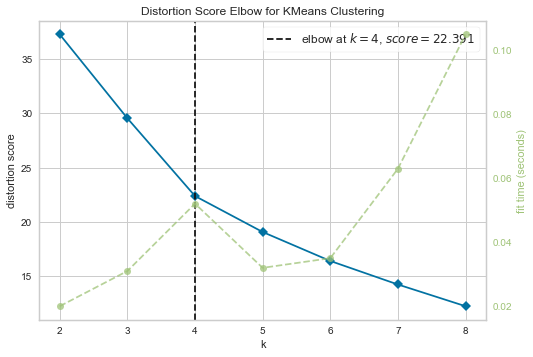

In [89]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show();

In [92]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2920423181703729
For n_clusters=3, the silhouette score is 0.38442900299066707
For n_clusters=4, the silhouette score is 0.4054457824344062
For n_clusters=5, the silhouette score is 0.4452677738425777
For n_clusters=6, the silhouette score is 0.4551190540335541
For n_clusters=7, the silhouette score is 0.44217554496426614
For n_clusters=8, the silhouette score is 0.4318038826546976


#### Last Decision

In [98]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
cluster_labels = kmeans.labels_

In [99]:
df["cluster_k5"] = cluster_labels

Text(0.5, 1.0, 'No Group')

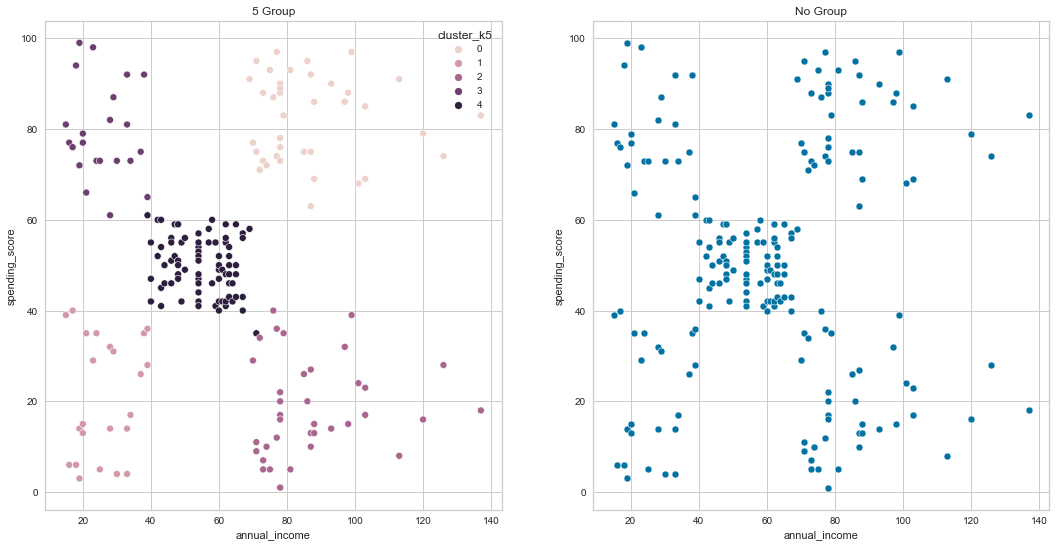

In [101]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score", hue = 'cluster_k5')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score")
plt.title("No Group")

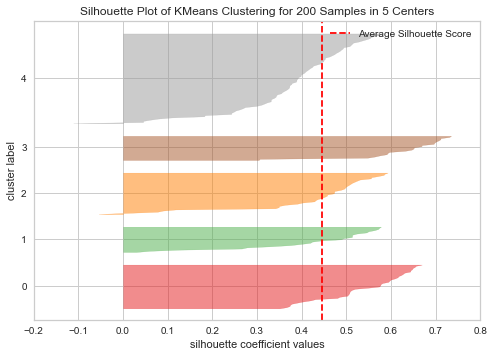

In [102]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof();

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [104]:
hc_ward = linkage(y = df, method = "ward")

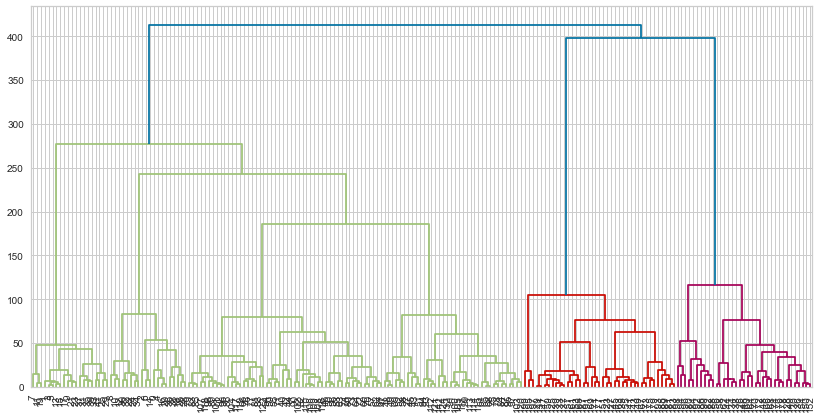

In [105]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

Yukarıdaki dendegram a göre 3 kümeye bölünürse saçma olabilir, domain bilgisi lazım, bknz. asker datası.

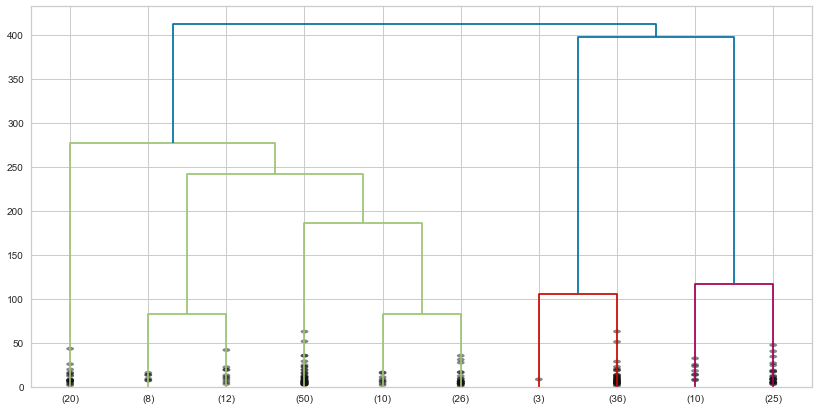

In [76]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [106]:
from sklearn.cluster import AgglomerativeClustering  # Tüme varım: en alttakinden başlayıp gözlemden kümeye


In [107]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.3003706584992562
Silhouette Score for 3 clusters: 0.382822815067976
Silhouette Score for 4 clusters: 0.4110965270797882
Silhouette Score for 5 clusters: 0.4434178043374487
Silhouette Score for 6 clusters: 0.44666250785582506
Silhouette Score for 7 clusters: 0.42990094888051245
Silhouette Score for 8 clusters: 0.42599666052676227
Silhouette Score for 9 clusters: 0.41520747411041087


In [108]:
model = AgglomerativeClustering(n_clusters=6, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df)

In [109]:
df["predicted_clusters"] = clusters


In [111]:
df.groupby("predicted_clusters").mean()


,age,annual_income,spending_score,gender_Male,cluster_k4,cluster_k5
predicted_clusters,,,,,,
0,41.685714,88.228571,17.285714,0.571429,3.000000,2.057143
1,43.900000,24.450000,19.100000,0.400000,5.000000,1.000000
2,32.692308,86.538462,82.128205,0.461538,0.000000,0.000000
3,24.850000,24.950000,81.000000,0.400000,2.000000,3.000000
4,25.916667,55.138889,49.222222,0.333333,3.888889,3.777778
5,54.560000,53.520000,49.160000,0.440000,1.320000,3.820000


In [112]:
df.predicted_clusters.value_counts()


5    50
2    39
4    36
0    35
1    20
3    20
Name: predicted_clusters, dtype: int64

#### iii. *Visualizing and Labeling All the Clusters* 

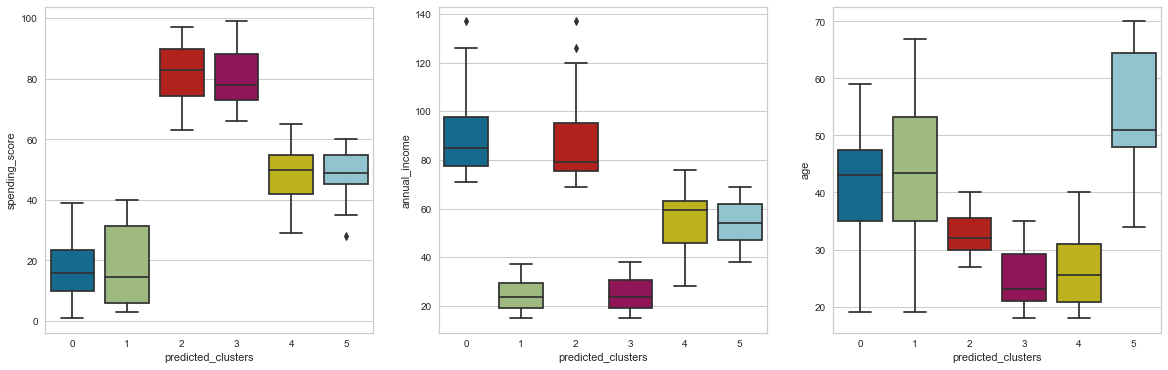

In [113]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "spending_score", x = "predicted_clusters", data = df)

plt.subplot(132)
sns.boxplot(y = "annual_income", x = "predicted_clusters", data = df)

plt.subplot(133)
sns.boxplot(y = "age", x = "predicted_clusters", data = df);

### Conclusion

In [84]:
NO idea

SyntaxError: invalid syntax (<ipython-input-84-b2f749bc12b5>, line 1)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___